# GRADED CHALLENGE 3

## I. Introduction

Nama: Nurrahmawati

Batch: FTDS-002

> Objektif :

>Penyakit kardiovaskular (CVDs) adalah gangguan pada jantung dan pembuluh darah termasuk, penyakit jantung koroner (serangan jantung), penyakit serebrovaskular (stroke), gagal jantung (HF), dan jenis patologi lainnya. Secara keseluruhan, penyakit kardiovaskular menyebabkan kematian sekitar 17 juta orang di seluruh dunia setiap tahunnya, dengan angka kematian meningkat untuk pertama kalinya dalam 50 tahun di Inggris. Secara khusus, gagal jantung terjadi ketika jantung tidak mampu memompa cukup darah ke tubuh, dan biasanya disebabkan oleh diabetes, tekanan darah tinggi, atau kondisi atau penyakit jantung lainnya.

>Mengenai ciri-cirinya, creatinine phosphokinase (CPK) menyatakan kadar enzim CPK dalam darah. Ketika jaringan otot rusak, CPK mengalir ke dalam darah. Oleh karena itu, kadar CPK yang tinggi dalam darah pasien dapat mengindikasikan gagal jantung atau cedera. Fraksi ejeksi menyatakan persentase berapa banyak darah yang dipompa oleh ventrikel kiri pada setiap kontraksi. Kreatinin serum adalah produk limbah yang dihasilkan oleh kreatin, saat otot rusak. Terutama, dokter fokus pada serum kreatinin dalam darah untuk memeriksa fungsi ginjal. Jika seorang pasien memiliki kadar kreatinin serum yang tinggi, ini mungkin mengindikasikan disfungsi ginjal. Sodium adalah mineral yang berfungsi untuk fungsi otot dan saraf yang benar. Tes natrium serum adalah pemeriksaan darah rutin yang menunjukkan apakah pasien memiliki kadar natrium yang normal dalam darah. Tingkat natrium yang sangat rendah dalam darah mungkin disebabkan oleh gagal jantung. Fitur peristiwa kematian, yang kami gunakan sebagai target dalam studi klasifikasi biner kami, menyatakan jika pasien meninggal atau bertahan hidup sebelum akhir masa tindak lanjut, rata-rata adalah 130 hari.

>Tujuan dari proyek ini adalah untuk menerapkan beberapa machine learning classifiers untuk memprediksi kelangsungan hidup pasien, dan memberi peringkat fitur yang sesuai dengan faktor risiko yang paling penting.

Data extraction from ftds-hacktiv8-project 
```txt
SELECT * FROM `ftds-hacktiv8-project.phase1_ftds_002_hck.heart-failure`
```

## II. Import Libraries

In [58]:
# Define Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import seaborn as sns
from scipy import stats

# For Classifier Problems
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

# Split Dataset and Standarize the Datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder

from imblearn.over_sampling import SMOTE
from collections import Counter

from feature_engine.outliers import Winsorizer

# Evaluate Regression Models
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, confusion_matrix

# Error and Display settings
pd.set_option('display.max_column', None)
pd.set_option('display.max_rows', 100)
import warnings
warnings.filterwarnings('ignore')

## III. Data Loading

In [2]:
# Load Dataset
data = pd.read_csv('h8dsft_P1G3_Nurrahmawati.csv')
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,42.0,1,250,1,15,0,213000.0,1.3,136,0,0,65,1
1,46.0,0,168,1,17,1,271000.0,2.1,124,0,0,100,1
2,65.0,1,160,1,20,0,327000.0,2.7,116,0,0,8,1
3,53.0,1,91,0,20,1,418000.0,1.4,139,0,0,43,1
4,50.0,1,582,1,20,1,279000.0,1.0,134,0,0,186,0


In [3]:
data.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,63.0,1,122,1,60,0,267000.00,1.2,145,1,0,147,0
295,45.0,0,308,1,60,1,377000.00,1.0,136,1,0,186,0
296,70.0,0,97,0,60,1,220000.00,0.9,138,1,0,186,0
297,53.0,1,446,0,60,1,263358.03,1.0,139,1,0,215,0
298,50.0,0,582,0,62,1,147000.00,0.8,140,1,1,192,0


In [4]:
# Checking Basic Information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


Berdasarkan data informasi ini, terlihat bahwa ada dua tipe data ini, yaitu tipe int64 dan float64. Selain itu, terlihat bahwa data ini mewakili semuanya dengan 299 entri data yang dapat diartikan sebagai tidak ada nilai yang hilang (missing value).

In [5]:
# Check Percentage Missing Values
data.isnull().mean()

age                         0.0
anaemia                     0.0
creatinine_phosphokinase    0.0
diabetes                    0.0
ejection_fraction           0.0
high_blood_pressure         0.0
platelets                   0.0
serum_creatinine            0.0
serum_sodium                0.0
sex                         0.0
smoking                     0.0
time                        0.0
DEATH_EVENT                 0.0
dtype: float64

In [6]:
# Checking data duplicated
data[data.duplicated()].shape

(0, 13)

Dapat terlihat bahwa pada dataset yang digunakan tidak terdapat duplikasi data dalam dataset.

In [7]:
for i in data.columns.tolist():
    print(f'num of unique label in {i}: ', len(data[i].unique()))

num of unique label in age:  47
num of unique label in anaemia:  2
num of unique label in creatinine_phosphokinase:  208
num of unique label in diabetes:  2
num of unique label in ejection_fraction:  17
num of unique label in high_blood_pressure:  2
num of unique label in platelets:  176
num of unique label in serum_creatinine:  40
num of unique label in serum_sodium:  27
num of unique label in sex:  2
num of unique label in smoking:  2
num of unique label in time:  148
num of unique label in DEATH_EVENT:  2


In [8]:
num = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']
data[num].describe()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
count,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000
mean,60.833893,581.839465,38.083612,263358.029264,1.39388,136.625418,130.260870
std,11.894809,970.287881,11.834841,97804.236869,1.03451,4.412477,77.614208
min,40.000000,23.000000,14.000000,25100.000000,0.50000,113.000000,4.000000
25%,51.000000,116.500000,30.000000,212500.000000,0.90000,134.000000,73.000000
50%,60.000000,250.000000,38.000000,262000.000000,1.10000,137.000000,115.000000
75%,70.000000,582.000000,45.000000,303500.000000,1.40000,140.000000,203.000000
max,95.000000,7861.000000,80.000000,850000.000000,9.40000,148.000000,285.000000


Bedasarkan hasil describe diatas, diketahui bahwa tidak terdapat keanehan pada data numerik, seperti terdapat data missing value 99999 dll, sehingga data ini dapat diproses pada tahap selanjutnya hingga modelling

In [9]:
cat = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']
for i in data[cat].columns.tolist():
    print(i, '\n')
    print(data[cat][i].value_counts().head())
    print('-'*30)

anaemia 

0    170
1    129
Name: anaemia, dtype: int64
------------------------------
diabetes 

0    174
1    125
Name: diabetes, dtype: int64
------------------------------
high_blood_pressure 

0    194
1    105
Name: high_blood_pressure, dtype: int64
------------------------------
sex 

1    194
0    105
Name: sex, dtype: int64
------------------------------
smoking 

0    203
1     96
Name: smoking, dtype: int64
------------------------------


Beberapa nama kolom menurut kami terlalu panjang, sehingga kami ingin mengubah beberapa nama kolom untuk memudahkan kami mengerjakan proyek ini. Nama kolom yang akan diganti adalah:

creatinine_phosphokinase -> cpk

ejection_fraction -> ef

high_blood_pressure -> hbp

serum_creatinine -> sCre

serum_sodium -> sSod

Berdasarkan gambaran umum:
- tidak ada nilai yang hilang pada data
- tidak ada entri duplikat data
- mengubah nama kolom yang terlalu panjang
- mengubah tipe data float68 pada kolom age dan platelets menjadi tipe data int68

## IV Data Cleaning

In [10]:
data_clean = data.copy()
data_clean.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,42.0,1,250,1,15,0,213000.0,1.3,136,0,0,65,1
1,46.0,0,168,1,17,1,271000.0,2.1,124,0,0,100,1
2,65.0,1,160,1,20,0,327000.0,2.7,116,0,0,8,1
3,53.0,1,91,0,20,1,418000.0,1.4,139,0,0,43,1
4,50.0,1,582,1,20,1,279000.0,1.0,134,0,0,186,0


Data ini memiliki 13 atribut. Attribute Information:

- age                       : umur pasien
- anaemia                   : apakah ada pengurangan haemoglobin (0 = No, 1 = Yes)
- creatinine_phosphokinase  : level enzim CPK dalam mcg/L
- diabetes                  : apakah pasien punya riwayat diabetes (0 = No, 1 = Yes)
- ejection_fraction         : persentase darah yang meninggalkan jantung dalam persentasi di setiap kontraksi jantung
- high_blood_pressure       : apakah pasien punya darah tinggi (0 = No, 1 = Yes)
- platelets                 : jumlah platelet di darah dalam kiloplatelets/mL
- serum_creatinine          : level serum creatinine di darah dalam mg/dL
- serum_sodium              : level serum sodium di darah dalam mEq/L
- sex                       : apakah pasien pria atau wanita (0 = Wanita, 1 = Pria)
- smoking                   : apakah pasien merokok (0 = No, 1 = Yes)
- time                      : waktu dalam hari untuk follow-up
- DEATH_EVENT               : apakah pasien sudah meninggal saat waktu follow-up (0 = No, 1 = Yes)

In [11]:
# Change type of data
data_clean['age'] = data_clean.age.astype('int64')
data_clean['platelets'] = data_clean.platelets.astype('int64')

In [12]:
# Rename column
data_clean.rename(columns={'creatinine_phosphokinase':'cpk',
                   'ejection_fraction':'ef',
                   'high_blood_pressure':'hbp',
                   'serum_creatinine':'sCre',
                   'serum_sodium':'sSod'} , inplace=True)
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          299 non-null    int64  
 1   anaemia      299 non-null    int64  
 2   cpk          299 non-null    int64  
 3   diabetes     299 non-null    int64  
 4   ef           299 non-null    int64  
 5   hbp          299 non-null    int64  
 6   platelets    299 non-null    int64  
 7   sCre         299 non-null    float64
 8   sSod         299 non-null    int64  
 9   sex          299 non-null    int64  
 10  smoking      299 non-null    int64  
 11  time         299 non-null    int64  
 12  DEATH_EVENT  299 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 30.5 KB


In [13]:
data_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.829431,11.894997,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
cpk,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ef,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
hbp,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.026756,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
sCre,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
sSod,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


Rata-rata variabel "DEATH_EVENT", adalah 0,32, yang menunjukkan bahwa 32 persen pengamatan dalam kumpulan data memiliki DEATH_EVENT sama dengan 1.
Oleh karena itu, akurasi garis dasar adalah 68 persen dan model yang kami buat pasti akan mengalahkan tolok ukur garis dasar ini.
Selain itu, dataset memiliki tingkat ketidakseimbangan kelas yang ringan sehingga akurasi saja tidak cukup untuk menentukan kinerja model nantinya.
Fitur creatine_phosphokinase dan platelet memiliki variasi yang sangat besar dibandingkan dengan fitur lainnya.
Usia berkisar antara 40 hingga 95 tahun dengan rata-rata 60 tahun. Jadi dataset condong ke populasi yang lebih tua.
Rerata variabel jenis kelamin adalah 0,65 yang menunjukkan bahwa variabel tersebut condong ke laki-laki (jenis kelamin=1)

## V. EDA for Analysis Purpose

In [14]:
fig = px.pie(data_clean, names='age', height=600, width= 600, color_discrete_sequence=px.colors.sequential.RdBu,  title='Pie Chart for Different Age Values')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

Berdasarkan visualisasi di atas, diketahui bahwa pada penderita gangguan jantung terbesar berada pada kalangan umur 60 tahun

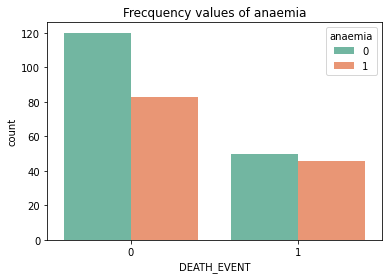

In [15]:
sns.countplot(x ='DEATH_EVENT', hue = "anaemia", data = data_clean, palette = "Set2")
plt.title('Frecquency values of anaemia')
plt.show()

Pada visualisasi di atas, secara keseluruhan diketahui bahwa perbandingan antara seseorang baik yang mengalami pengurangan hemoglobin (anemia) atau tidak cenderung lebih banyak yang tidak meninggal dibandingkan dengan yang meninggal. Sedangkan untuk frekuensi seseorang yang meninggal lebih banyak yang tidak mengalami penurunan hemoglobin (anemia), begitupun untuk frekuensi seseorang yang tidak meninggal lebih banyak yang tidak mengalamai penurunan hemoglobin (anemia)

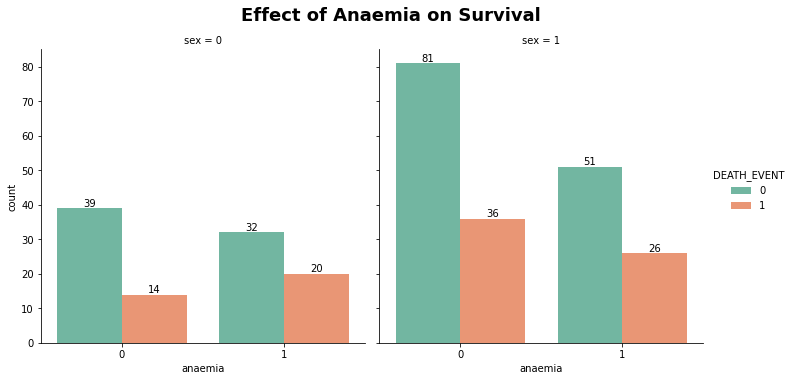

In [16]:
g = sns.catplot(x="anaemia",  kind="count", hue= "DEATH_EVENT", col = "sex", data = data_clean, palette="Set2");
g.fig.suptitle("Effect of Anaemia on Survival", y=1.05, fontsize=18, fontweight="bold")

# iterate through axes
for ax in g.axes.ravel():

    # iterate through the axes containers
    for c in ax.containers:
        labels = [v.get_height() for v in c]
        ax.bar_label(c, labels=labels, label_type='edge')

Hampir setengah dari perempuan menderita anemia.
13% wanita yang meninggal tidak menderita anemia.
19% wanita yang meninggal menderita anemia.
40% laki-laki mengalami anemia.
19% laki-laki yang meninggal tidak menderita anemia.
13% laki-laki yang meninggal menderita anemia.
Tampaknya anemia bukan merupakan faktor risiko utama terutama pada pria.

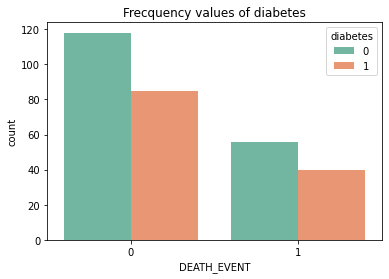

In [17]:
sns.countplot(x ='DEATH_EVENT', hue = "diabetes", data = data_clean, palette = "Set2")
plt.title('Frecquency values of diabetes')
plt.show()

Pada visualisasi di atas, secara keseluruhan diketahui bahwa perbandingan antara seseorang baik yang mempunyai darah tinggi atau tidak cenderung lebih banyak yang tidak meninggal dibandingkan dengan yang meninggal. Sedangkan untuk frekuensi seseorang yang meninggal lebih banyak yang tidak mempunyai darah tinggi, begitupun untuk frekuensi seseorang yang tidak meninggal lebih banyak yang tidak mempunyai darah tinggi.

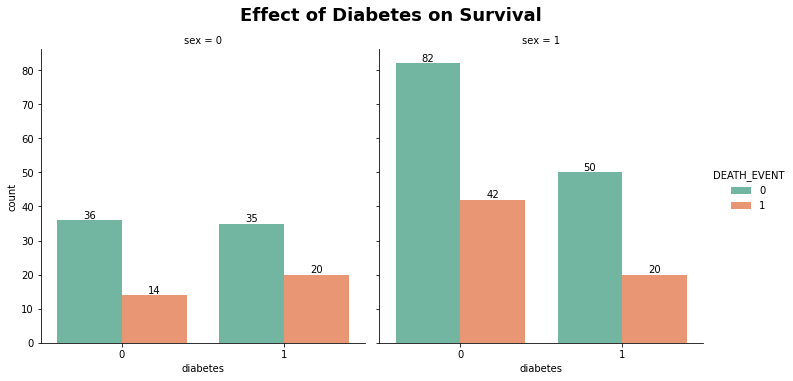

In [18]:
g = sns.catplot(x="diabetes", kind="count",hue="DEATH_EVENT", data = data_clean ,col="sex", palette="Set2");
g.fig.suptitle("Effect of Diabetes on Survival", y=1.05, fontsize=18, fontweight="bold")

# iterate through axes
for ax in g.axes.ravel():

    # iterate through the axes containers
    for c in ax.containers:
        labels = [v.get_height() for v in c]
        ax.bar_label(c, labels=labels, label_type='edge')

52% wanita menderita diabetes.
19% wanita dengan diabetes meninggal.
13% wanita tanpa diabetes meninggal.
36% pria menderita diabetes.
10% pria dengan diabetes meninggal.
22% pria tanpa diabetes meninggal.
Diabetes tampaknya bukan penyebab utama kematian di antara para pasien.

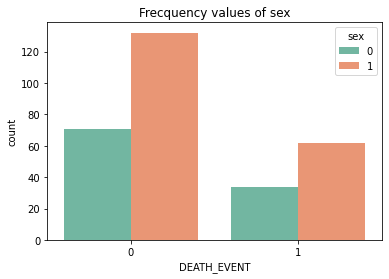

In [19]:
sns.countplot(x ='DEATH_EVENT', hue = "sex", data = data_clean, palette = "Set2")
plt.title('Frecquency values of sex')
plt.show()

Pada visualisasi di atas, frekuensi seseorang yang meninggal lebih banyak berjenis kelamin wanita dibandingkan pria, begitupun dengan frekuensi seseorang yang tidak meninggal lebih banyak yang berjenis kelamin wanita.

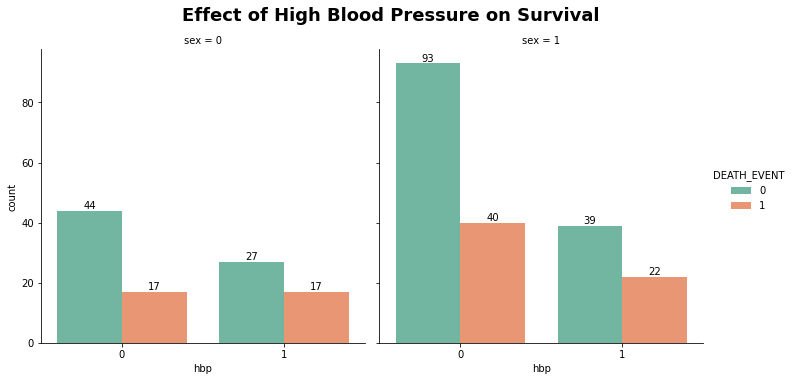

In [20]:
g = sns.catplot(x="hbp", kind="count", hue="DEATH_EVENT", col="sex", data = data_clean, palette="Set2");

g.fig.suptitle("Effect of High Blood Pressure on Survival", y=1.05, fontsize=18, fontweight="bold")

# iterate through axes
for ax in g.axes.ravel():

    # iterate through the axes containers
    for c in ax.containers:
        labels = [v.get_height() for v in c]
        ax.bar_label(c, labels=labels, label_type='edge')

42% wanita memiliki tekanan darah tinggi.
16% wanita dengan tekanan darah tinggi meninggal.
16% wanita tanpa tekanan darah tinggi meninggal.
31% pria memiliki tekanan darah tinggi.
11% pria dengan tekanan darah tinggi meninggal.
21% pria tanpa tekanan darah tinggi meninggal.
Tekanan darah tinggi saja bukanlah faktor risiko utama.

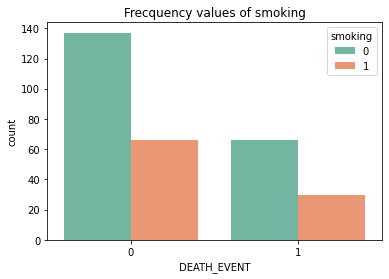

In [21]:
sns.countplot(x ='DEATH_EVENT', hue = "smoking", data = data_clean, palette = "Set2")
plt.title('Frecquency values of smoking')
plt.show()

Pada visualisasi di atas, secara keseluruhan diketahui bahwa perbandingan antara seseorang baik yang merokok atau tidak cenderung lebih banyak yang tidak meninggal dibandingkan dengan yang meninggal. Sedangkan untuk frekuensi seseorang yang meninggal lebih banyak yang tidak merokok, begitupun untuk frekuensi seseorang yang tidak meninggal lebih banyak yang tidak merokok.

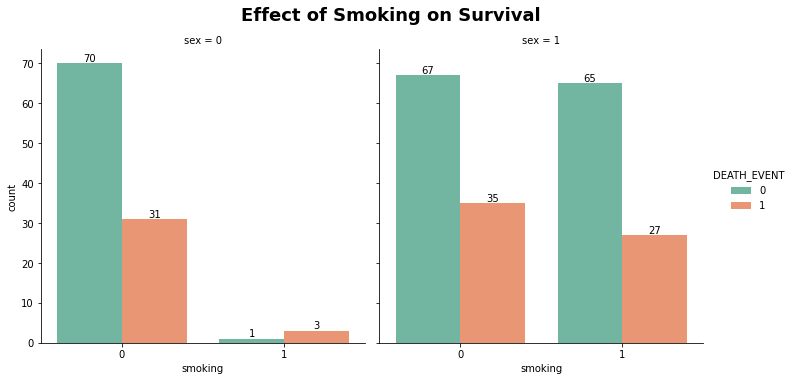

In [22]:
g = sns.catplot(x="smoking", kind="count", hue="DEATH_EVENT", col="sex", data = data_clean, palette="Set2");

g.fig.suptitle("Effect of Smoking on Survival", y=1.05, fontsize=18, fontweight="bold")

# iterate through axes
for ax in g.axes.ravel():

    # iterate through the axes containers
    for c in ax.containers:
        labels = [v.get_height() for v in c]
        ax.bar_label(c, labels=labels, label_type='edge')

Merokok populer di kalangan pria dibandingkan dengan wanita: 0,04% wanita merokok.
3 dari 4 perokok pada wanita meninggal.
30% wanita bukan perokok meninggal.
47% pria merokok.
14% perokok pria meninggal.
18% pria bukan perokok meninggal.
Setidaknya berdasarkan data laki-laki, merokok tampaknya tidak menjadi faktor risiko utama.

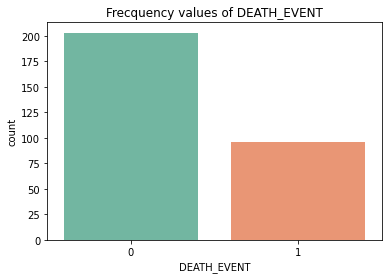

In [23]:
sns.countplot(x = 'DEATH_EVENT', data = data_clean, palette = 'Set2')
plt.title('Frecquency values of DEATH_EVENT')
plt.show()

Pada visualisasi di atas, dapat terlihat bahwa kolom DEATH_EVENT menunjukan data yang imbalanced. Imbalnaced sendiri merupakan suatu keadaan dimana distribusi kelas data tidak seimbang, jumlah kelas data (instance) yang satu lebih sedikit atau lebih banyak dibanding dengan jumlah kelas data lainnya. Selanjutnya akan kami lakukan penanganan agar data menjadi seimbang.

## VI. Split data into Train and Test

Pisahkan sampel sebelum split data untuk inferensi model nanti

In [24]:
# separating inference data
data_inf = data_clean.sample(10, random_state=32)
# reseting index
data_inf.reset_index(drop=True, inplace=True)
data_inf

,age,anaemia,cpk,diabetes,ef,hbp,platelets,sCre,sSod,sex,smoking,time,DEATH_EVENT
0,65,0,146,0,20,0,162000,1.30,129,1,1,7,1
1,55,1,180,0,45,0,263358,1.18,137,1,1,211,0
2,85,0,129,0,60,0,306000,1.20,132,1,1,90,1
3,57,1,129,0,30,0,395000,1.00,140,0,0,42,1
4,62,0,231,0,25,1,253000,0.90,140,1,1,10,1
5,55,0,835,0,40,0,279000,0.70,140,1,1,147,0
6,54,1,427,0,70,1,151000,9.00,137,0,0,196,1
7,70,0,97,0,60,1,220000,0.90,138,1,0,186,0
8,63,1,103,1,35,0,179000,0.90,136,1,1,270,0
9,60,0,68,0,20,0,119000,2.90,127,1,1,64,1


In [25]:
# separating inferential data from dataframe
data_eda = data_clean.drop(data_inf.index)
# reseting index
data_eda.reset_index(drop=True, inplace=True)
data_eda

,age,anaemia,cpk,diabetes,ef,hbp,platelets,sCre,sSod,sex,smoking,time,DEATH_EVENT
0,60,1,156,1,25,1,318000,1.2,137,0,0,85,0
1,60,0,1896,1,25,0,365000,2.1,144,0,0,172,1
2,65,0,56,0,25,0,237000,5.0,130,0,0,207,0
3,72,0,211,0,25,0,274000,1.2,134,0,0,207,0
4,49,1,80,0,30,1,427000,1.0,138,0,0,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,63,1,122,1,60,0,267000,1.2,145,1,0,147,0
285,45,0,308,1,60,1,377000,1.0,136,1,0,186,0
286,70,0,97,0,60,1,220000,0.9,138,1,0,186,0
287,53,1,446,0,60,1,263358,1.0,139,1,0,215,0


Menentukan antara fitur dan target. Terlihat dalam hal ini target berada di kolom death_event dan bisa kita atur sebagai variabel y, sedangkan selain kolom death_event kita bisa atur ke variabel x.

In [26]:
# Splitting features and target

X = data_eda.drop('DEATH_EVENT', axis=1) 
y = data_eda['DEATH_EVENT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)

In [27]:
for i in [X_train, X_test, y_train, y_test]:
    print(i.shape)

(202, 12)
(87, 12)
(202,)
(87,)


Dapat kita lihat bentuk antara X dan Y dari setiap data train dan test. Artinya distribusi datanya adalah 70% untuk data train dan 30% untuk data test dari data (`data_eda`) sehingga data train memiliki bentuk 202 baris dan data test memiliki 87 baris.

In [28]:
# for EDA model creation, use dataframe stored in data_eda
data_eda = pd.concat([X_train, y_train], axis=1)

data_eda.shape

(202, 13)

Menggabungkan kembali dari X dan Y yang telah kita pisahkan, tetapi yang digabungkan hanya untuk data train saja. Data untuk pengujian berbeda ketika data prapemrosesan berasal dari data train

## VII. EDA FOR MODELING

In [29]:
data_eda.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202 entries, 59 to 112
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          202 non-null    int64  
 1   anaemia      202 non-null    int64  
 2   cpk          202 non-null    int64  
 3   diabetes     202 non-null    int64  
 4   ef           202 non-null    int64  
 5   hbp          202 non-null    int64  
 6   platelets    202 non-null    int64  
 7   sCre         202 non-null    float64
 8   sSod         202 non-null    int64  
 9   sex          202 non-null    int64  
 10  smoking      202 non-null    int64  
 11  time         202 non-null    int64  
 12  DEATH_EVENT  202 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 22.1 KB


In [30]:
for i in data_eda.columns.tolist():
    print(f'num of unique label in {i}: ', len(data_eda[i].unique()))

num of unique label in age:  44
num of unique label in anaemia:  2
num of unique label in cpk:  142
num of unique label in diabetes:  2
num of unique label in ef:  15
num of unique label in hbp:  2
num of unique label in platelets:  137
num of unique label in sCre:  31
num of unique label in sSod:  19
num of unique label in sex:  2
num of unique label in smoking:  2
num of unique label in time:  116
num of unique label in DEATH_EVENT:  2


Berdasarkan informasi di atas yg menjelaskan tentang banyaknya jumlah unique value dalam setiap feature, maka dapat kita golongkan feature-feature tersebut menjadi 2 golongan yang mana untuk golongan categorical feature untuk unique yg berjumlah 2 dan selebihnya masuk ke dalam numerik feature

In [31]:
# get name columns for data type numeric and categoric
num_col = ['age', 'cpk', 'ef', 'platelets', 'sCre', 'sSod', 'time']
cat_col = ['anaemia', 'diabetes', 'hbp', 'sex', 'smoking', 'DEATH_EVENT']

print('Numerical Columns   : ', data_eda[num_col].columns.tolist())
print('-'*50)
print('Categorical Columns : ', data_eda[cat_col].columns.tolist())

Numerical Columns   :  ['age', 'cpk', 'ef', 'platelets', 'sCre', 'sSod', 'time']
--------------------------------------------------
Categorical Columns :  ['anaemia', 'diabetes', 'hbp', 'sex', 'smoking', 'DEATH_EVENT']


In [32]:
data_eda[num_col].shape

(202, 7)

In [33]:
data_eda[cat_col].shape

(202, 6)

Kita pisahkan terlebih dahulu untuk data numerik dengan data kategorik, untuk data numerik terdapat 7 kolom dan untuk data kategoris terdapat 6 kolom

### **categorical features**

Karena dataset ini telah diencoding, maka kami tidak perlu dilakukan encoding untuk data kategorikal

In [34]:
data_cat = data_eda[cat_col]
data_cat.head()

,anaemia,diabetes,hbp,sex,smoking,DEATH_EVENT
59,1,0,1,0,0,0
192,0,0,0,1,0,0
173,0,0,0,1,1,0
108,0,1,0,1,0,1
24,0,0,1,0,0,0


In [35]:
for i in data_cat.columns.tolist():
    print(i, '\n')
    print(data_cat[i].value_counts().head())
    print('-'*30)

anaemia 

0    116
1     86
Name: anaemia, dtype: int64
------------------------------
diabetes 

0    117
1     85
Name: diabetes, dtype: int64
------------------------------
hbp 

0    132
1     70
Name: hbp, dtype: int64
------------------------------
sex 

1    135
0     67
Name: sex, dtype: int64
------------------------------
smoking 

0    134
1     68
Name: smoking, dtype: int64
------------------------------
DEATH_EVENT 

0    140
1     62
Name: DEATH_EVENT, dtype: int64
------------------------------


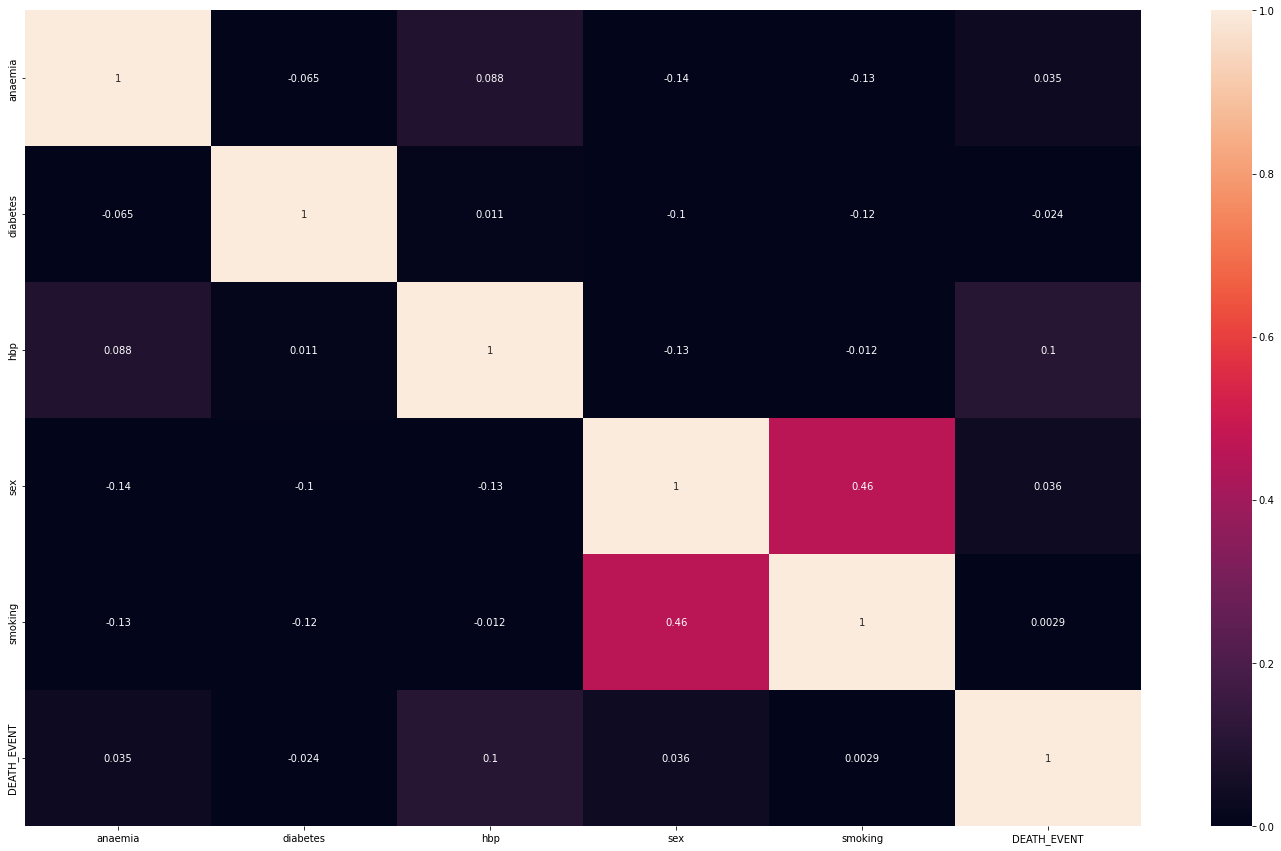

In [36]:
fig,ax = plt.subplots(figsize=[25,15])

corr = data_cat.corr()

ax = sns.heatmap(corr,annot=True, vmin=0, vmax=1)
plt.show()

Berdasarkan heatmap korelasi di atas, dapat kita lihat dari kelima feature tersebut, yang memiliki koefisien korelasi tertinggi terdapat pada feature tekanan darah tinggi (hbp) saja terhadap target (DEATH_EVENT) dibandingkan dengan feature lainnya sehingga kami hanya akan menggunakan feature tersebut dari feature kategorikal.

In [37]:
cat_selection = ['hbp', 'DEATH_EVENT']
data_eda[cat_selection].head()

,hbp,DEATH_EVENT
59,1,0
192,0,0
173,0,0
108,0,1
24,1,0


### **numerical feature**

Setelah kami melakukan seleksi feature untuk data kategorikal, maka kami akan fokus pada preprocessing data numerik

In [38]:
data_eda[num_col].head()

,age,cpk,ef,platelets,sCre,sSod,time
59,73,1185,40,220000,0.90,141,213
192,60,253,35,279000,1.70,140,250
173,81,4540,35,231000,1.18,137,107
108,59,66,20,70000,2.40,134,135
24,70,835,35,305000,0.80,133,145


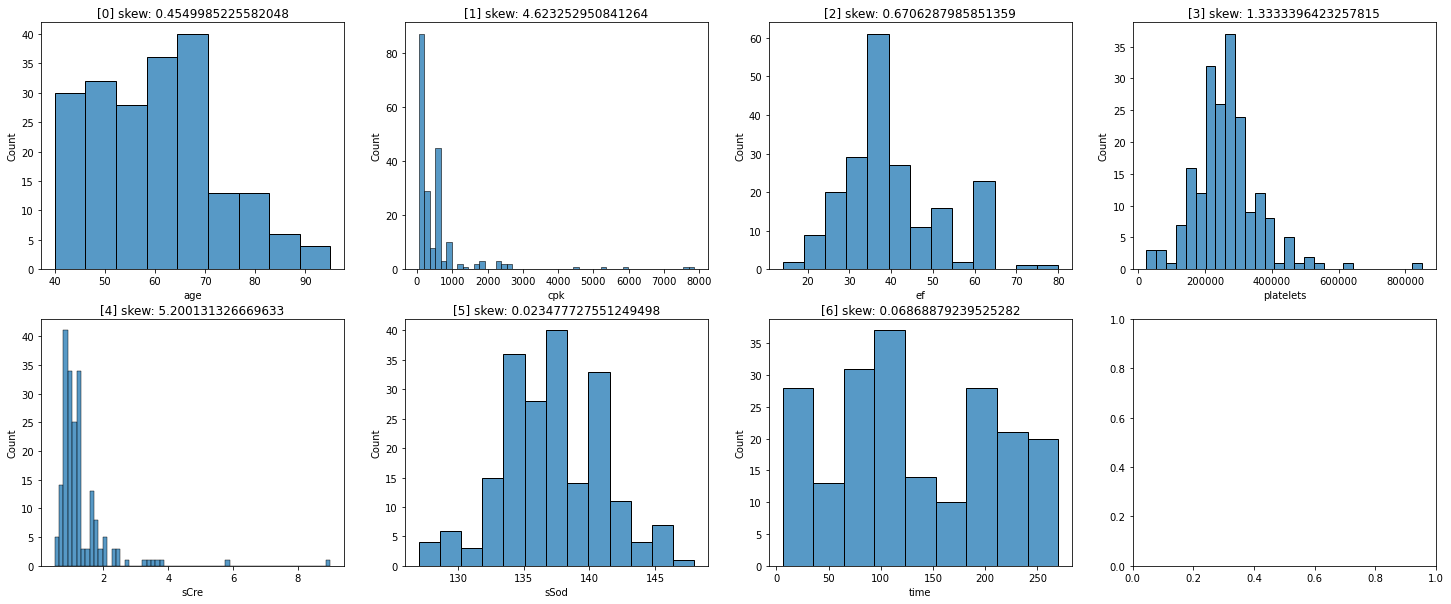

In [39]:
fig, ax = plt.subplots(ncols=4,nrows=2, figsize=[25,10])
ax = ax.flatten()

for idx, col in enumerate(data_eda[num_col]):
    sns.histplot(data_eda[num_col][col], ax=ax[idx])
    ax[idx].set_title(f'{[idx]} skew: {data_eda[num_col][col].skew()}')

In [40]:
def outlier_analysis(data_eda,col):
  skewness = data_eda[num_col][col].skew()
  if skewness>=-0.5 or skewness<=0.5:
    upper = data_eda[num_col][col].mean() + 3*data_eda[num_col][col].std()
    lower = data_eda[num_col][col].mean() - 3*data_eda[num_col][col].std()
  else:
    Q1 = data_eda[num_col][col].quantile(0.25)
    Q3 = data_eda[num_col][col].quantile(0.75)
    IQR = Q3 - Q1
    upper = Q1 + (1.5*IQR)
    lower = Q3 - (1.5*IQR)
  
  no_outliers = data_eda[num_col][(data_eda[num_col][col]>=lower) & (data_eda[num_col][col]<=upper)]
  outliers = data_eda[num_col][(data_eda[num_col][col]<lower) | (data_eda[num_col][col]>upper)]
  print('percentage outlier from',i,':',outliers.shape[0]/data_eda.shape[0] * 100, '%')
  return outliers,no_outliers, upper, lower

for i in list(data_eda[num_col].columns):
  outlier_analysis(data_eda[num_col],i)

percentage outlier from age : 0.0 %
percentage outlier from cpk : 2.4752475247524752 %
percentage outlier from ef : 0.49504950495049505 %
percentage outlier from platelets : 0.9900990099009901 %
percentage outlier from sCre : 0.9900990099009901 %
percentage outlier from sSod : 0.0 %
percentage outlier from time : 0.0 %


Pada case ini tidak dilakukan handling outlier dikarenakan persentase dalam outlier masih di anggap kecil sehingga tidak perlu dilakukan handling outlier

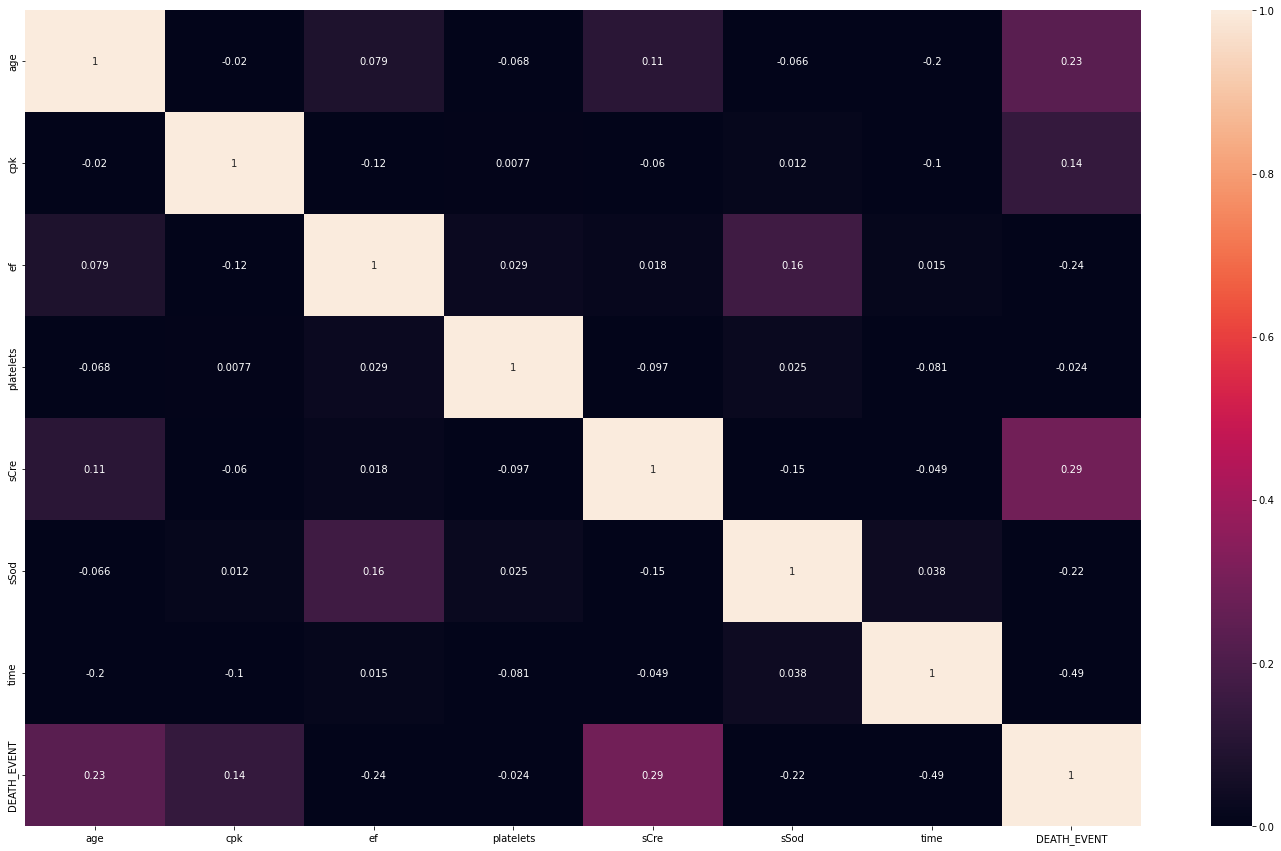

In [41]:
fig,ax = plt.subplots(figsize=[25,15])

corr = data_eda[num_col + ['DEATH_EVENT']].corr()

ax = sns.heatmap(corr,annot=True, vmin=0, vmax=1)
plt.show()

Berdasarkan heatmap korelasi di atas, pada feature numerik memiliki perbedaan dengan feature kategorikal. Berdasarkan analysis di atas bahwa semua feature numerik memiliki koefisien korelasi yang tinggi terhadap target (DEATH_EVENT) kecuali satu feature yaitu platelets. Sehingga kami akan menggunakan keenam feature di atas dalam pembuatan model machine learning nantinya.

In [42]:
num_selection = ['age', 'sCre', 'cpk', 'ef', 'sSod', 'time']
data_eda[num_selection].head()

,age,sCre,cpk,ef,sSod,time
59,73,0.90,1185,40,141,213
192,60,1.70,253,35,140,250
173,81,1.18,4540,35,137,107
108,59,2.40,66,20,134,135
24,70,0.80,835,35,133,145


**combine Numerical and Categorical data after processed**

In [43]:
data_eda = pd.concat([data_eda[num_selection].reset_index(drop=True), data_eda[cat_selection].reset_index(drop=True)], axis=1)
data_eda.head()

,age,sCre,cpk,ef,sSod,time,hbp,DEATH_EVENT
0,73,0.90,1185,40,141,213,1,0
1,60,1.70,253,35,140,250,0,0
2,81,1.18,4540,35,137,107,0,0
3,59,2.40,66,20,134,135,0,1
4,70,0.80,835,35,133,145,1,0


In [44]:
norm = 0
nonorm = 0
for col in data_eda[['age', 'sCre', 'cpk', 'ef', 'sSod', 'time']]:
  if data_eda[col].skew() >=-0.5 and data_eda[col].skew() <0.5:
    norm += 1
  else:
    nonorm +=1

if norm > nonorm:
  scaler = StandardScaler()
else:
  scaler = MinMaxScaler()
scaler

MinMaxScaler()

In [45]:
# numerical scaling

num_col = ['age', 'sCre', 'cpk', 'ef', 'sSod', 'time']
scaler = MinMaxScaler()

data_eda[num_col] = pd.DataFrame(scaler.fit_transform(data_eda[num_col]))
data_eda.head()

,age,sCre,cpk,ef,sSod,time,hbp,DEATH_EVENT
0,0.600000,0.047059,0.145636,0.393939,0.666667,0.784091,1,0
1,0.363636,0.141176,0.026363,0.318182,0.619048,0.924242,0,0
2,0.745455,0.080000,0.574994,0.318182,0.476190,0.382576,0,0
3,0.345455,0.223529,0.002432,0.090909,0.333333,0.488636,0,1
4,0.545455,0.035294,0.100845,0.318182,0.285714,0.526515,1,0


1. Feature Selection -> 'age', 'sCre', 'cpk', 'ef', 'sSod', 'time', 'hbp', dan 'DEATH_EVENT'
3. Scaling on numerical features

## VIII. Data Preprocessing

1. Feature Selection -> 'age', 'sCre', 'cpk', 'ef', 'sSod', 'time', 'hbp', dan 'DEATH_EVENT'
3. Scaling on numerical features

Selanjutnya kita akan melakukan testing modelling pada data test yang telah kita pisahkan di awal.

In [46]:
testing = pd.concat([X_test, y_test], axis=1)
testing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87 entries, 132 to 52
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          87 non-null     int64  
 1   anaemia      87 non-null     int64  
 2   cpk          87 non-null     int64  
 3   diabetes     87 non-null     int64  
 4   ef           87 non-null     int64  
 5   hbp          87 non-null     int64  
 6   platelets    87 non-null     int64  
 7   sCre         87 non-null     float64
 8   sSod         87 non-null     int64  
 9   sex          87 non-null     int64  
 10  smoking      87 non-null     int64  
 11  time         87 non-null     int64  
 12  DEATH_EVENT  87 non-null     int64  
dtypes: float64(1), int64(12)
memory usage: 9.5 KB


In [48]:
testing_cleaned = testing[['age', 'sCre', 'cpk', 'ef', 'sSod', 'time', 'hbp', 'DEATH_EVENT']]

testing_cleaned.head()

,age,sCre,cpk,ef,sSod,time,hbp,DEATH_EVENT
132,60,3.5,59,25,136,187,1,0
105,60,2.9,68,20,127,64,0,1
193,60,1.4,320,35,139,258,0,0
283,60,1.0,95,60,138,146,0,0
121,63,1.3,514,25,134,83,1,0


In [49]:
# numerical scalling
testing_cleaned[num_col] = scaler.transform(testing_cleaned[num_col])
testing_cleaned.head()

,age,sCre,cpk,ef,sSod,time,hbp,DEATH_EVENT
132,0.363636,0.352941,0.001536,0.166667,0.428571,0.685606,1,0
105,0.363636,0.282353,0.002687,0.090909,0.000000,0.219697,0,1
193,0.363636,0.105882,0.034937,0.318182,0.571429,0.954545,0,0
283,0.363636,0.058824,0.006143,0.696970,0.523810,0.530303,0,0
121,0.418182,0.094118,0.059765,0.166667,0.333333,0.291667,1,0


In [50]:
X_train = data_eda.drop('DEATH_EVENT',axis=1).copy()
y_train = data_eda['DEATH_EVENT']

X_test = testing_cleaned.drop('DEATH_EVENT',axis=1).copy()
y_test = testing_cleaned['DEATH_EVENT']

## IX. Imbalanced Target Data Handling

Seperti yang telah kami jelaskan di awal EDA, kelas-kelas di target merupakan data yang tidak seimbang. oleh karena itu untuk mengatasi masalah tersebut, kami akan menggunakan SMOTE untuk melakukan resampling data dan membuat kelas-kelas di target seimbang.

In [51]:
smote = SMOTE(k_neighbors=8)

In [52]:
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print('Before SMOTE : ', Counter(y_train))
print('After SMOTE :', Counter(y_train_smote))

Before SMOTE :  Counter({0: 140, 1: 62})
After SMOTE : Counter({0: 140, 1: 140})


In [55]:
y_train.value_counts()

0    140
1     62
Name: DEATH_EVENT, dtype: int64

In [54]:
y_train_smote.value_counts()

0    140
1    140
Name: DEATH_EVENT, dtype: int64

## X. Model Definition, Training, & hyperparameter tuning

dalam pemodelan ini, terdapat dua model yang akan dibuat dalam memprediksi gagal jantung atau tidak dengan menggunakan model randomforest dan adaBoost model.

> **Before Balancing**

In [56]:
# Defining Random Forest Classifier Model
rf_model = RandomForestClassifier()
# Defining AdaBoost Classifier Model
ada_model = AdaBoostClassifier()


# training model
for model in [rf_model, ada_model]:
    model.fit(X_train,y_train)

In [60]:
# checking cross validation score
cv_rf_model = cross_val_score(rf_model, X_train, y_train, cv=3, scoring="accuracy")
cv_ada_model = cross_val_score(ada_model, X_train, y_train, cv=3, scoring="accuracy")
cvh=0
for cv,name in zip([cv_rf_model, cv_ada_model],['rf_model','ada_model']):
    print(name)
    print('Accuracy - All - Cross Validation  : ', cv)
    print('Accuracy - Mean - Cross Validation : ', cv.mean())
    print('Accuracy - Std - Cross Validation  : ', cv.std())
    print('Accuracy - Range of Test-Set       : ', (cv.mean()-cv.std()) , '-', (cv.mean()+cv.std()))
    print('-'*50)
    if cv.mean()>cvh:
        cvh= cv.mean()
        nameh=name
    else:
        continue
print ('best model:', nameh)
print('cross-val mean:', cvh)

rf_model
Accuracy - All - Cross Validation  :  [0.83823529 0.82089552 0.8358209 ]
Accuracy - Mean - Cross Validation :  0.8316505706760315
Accuracy - Std - Cross Validation  :  0.007668577786510887
Accuracy - Range of Test-Set       :  0.8239819928895207 - 0.8393191484625424
--------------------------------------------------
ada_model
Accuracy - All - Cross Validation  :  [0.82352941 0.76119403 0.7761194 ]
Accuracy - Mean - Cross Validation :  0.7869476148668423
Accuracy - Std - Cross Validation  :  0.026575208860980942
Accuracy - Range of Test-Set       :  0.7603724060058613 - 0.8135228237278233
--------------------------------------------------
best model: rf_model
cross-val mean: 0.8316505706760315


Berdasarkan hasil cross validation di atas, dapat kita simpulkan untuk best model dari kedua model tersebut yaitu berada pada randomforest model. Randomforest model memiliki nilai rata-rata konsistensi (akurasi) yang lebih tinggi dibandingkan dengan adaBoost model yang bernilai 0.83. Selain itu standardeviasi atau persebaran data dari randomforest model jauh lebih rendah dibandingkan dengan adaBoost model yang artinya semakin konsisten data tersebut pada randomforest model.

In [65]:
# Evaluating the default random forest model
# creating prediction data
rf_y_pred_train = rf_model.predict(X_train)
rf_y_pred_test = rf_model.predict(X_test)
# Evaluating the model
print("Training")
print(classification_report(y_train,rf_y_pred_train))
print("\n===========================\n")
print("Test")
print(classification_report(y_test,rf_y_pred_test))


Training
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       140
           1       1.00      1.00      1.00        62

    accuracy                           1.00       202
   macro avg       1.00      1.00      1.00       202
weighted avg       1.00      1.00      1.00       202



Test
              precision    recall  f1-score   support

           0       0.89      0.95      0.92        61
           1       0.86      0.73      0.79        26

    accuracy                           0.89        87
   macro avg       0.88      0.84      0.86        87
weighted avg       0.88      0.89      0.88        87



Berikut adalah hasil dari classification report dari randomforest model (baseline) dengan data yang belum di balancing (imbalanced data). Berdasarkan penjelasan di awal bahwa untuk kelas 0 merupakan tidak terjadinya kematian yang disebabkan oleh gagal jantung sedangkan kelas 1 berarti terjadinya kematian karena penyebab dari gagal jantung seseorang tersebut. Berdasarkan classification report ini, kita dapat fokus pada kelas 1 dan fokus pada nilai recall karena urgensi dalam kasus gagal jantung ini sangat krusial sehingga kita harus meminimalisir kesalahan dalam prediksi model yang mana jika model memprediksi tidak akan terjadinya kematian atau pasien dianggap masih dalam batas baik-baik aja padahal dalam kenyataannya seseorang tersebut dapat dibilang kritis karena gagal jantung tersebut sehingga perlu diperhatikan dan ditangani dengan tepat. 

Prediksi tersebut harus diminimalisir agar tidak terjadi kesalahan yang dapat menyebabkan kematian pada pasien. Untuk mengurangi prediksi tersebut, nilai evaluasi recall harus mendekati 1 agar tidak terjadi kesalahan fatal seperti yang telah disebutkan sebelumnya. Pada laporan klasifikasi di atas diketahui nilai recall pada model randomforest dengan baseline hyperparameter sebesar 73% artinya model masih kurang baik dalam memprediksi kelas 1 yang disebabkan pada data ini imbalance

> **After Balancing**

In [61]:
# Defining Random Forest Classifier Model
rft_model = RandomForestClassifier()
# Defining AdaBoost Classifier Model
adaB_model = AdaBoostClassifier()


# training model
for model in [rft_model, adaB_model]:
    model.fit(X_train_smote,y_train_smote)

In [62]:
# checking cross validation score
cv_rft_model = cross_val_score(rft_model, X_train_smote, y_train_smote, cv=3, scoring="accuracy")
cv_adaB_model = cross_val_score(adaB_model, X_train_smote, y_train_smote, cv=3, scoring="accuracy")
cvh=0
for cv,name in zip([cv_rft_model, cv_adaB_model],['rft_model','adaB_model']):
    print(name)
    print('Accuracy - All - Cross Validation  : ', cv)
    print('Accuracy - Mean - Cross Validation : ', cv.mean())
    print('Accuracy - Std - Cross Validation  : ', cv.std())
    print('Accuracy - Range of Test-Set       : ', (cv.mean()-cv.std()) , '-', (cv.mean()+cv.std()))
    print('-'*50)
    if cv.mean()>cvh:
        cvh= cv.mean()
        nameh=name
    else:
        continue
print ('best model:', nameh)
print('cross-val mean:', cvh)

rft_model
Accuracy - All - Cross Validation  :  [0.79787234 0.88172043 0.93548387]
Accuracy - Mean - Cross Validation :  0.8716922138336002
Accuracy - Std - Cross Validation  :  0.05662541935544427
Accuracy - Range of Test-Set       :  0.8150667944781559 - 0.9283176331890445
--------------------------------------------------
adaB_model
Accuracy - All - Cross Validation  :  [0.74468085 0.84946237 0.91397849]
Accuracy - Mean - Cross Validation :  0.8360405704262944
Accuracy - Std - Cross Validation  :  0.06976403786009894
Accuracy - Range of Test-Set       :  0.7662765325661955 - 0.9058046082863933
--------------------------------------------------
best model: rft_model
cross-val mean: 0.8716922138336002


Sama halnya dengan hasil dari cross validation antar kedua model ini dengan penjelasan di atas pada data yang imbalance. Perbedaannya pada hasil ini merupakan hasil dari data yang sudah dilakukan balancing dengan metode SMOTE, Berdasarkan hasil cross validation ini, dapat kita simpulkan untuk best model dari kedua model tersebut yaitu berada pada randomforest model juga dengan nilai rata-rata akurasi tertinggi dan terendah pada nilai standardeviasinya dari adaBoost model. Jika dibandingkan dengan data sebelum balancing nilai rata-rata dari akurasi cross validationnya hanya 0,83 akan tetapi rata-rata dari akurasi cross validation pada data yang telah dilakukan balancing jauh lebih baik dibandingkan dengan data sebelum balancing sebesar 0,87 yang artinya konsistensi pada model tersebut semakin konsisten


In [66]:
# Evaluating the default random forest model
# creating prediction data
rft_y_pred_train = rft_model.predict(X_train_smote)
rft_y_pred_test = rft_model.predict(X_test)
# Evaluating the model
print("Training")
print(classification_report(y_train_smote,rft_y_pred_train))
print("\n===========================\n")
print("Test")
print(classification_report(y_test,rft_y_pred_test))


Training
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       140
           1       1.00      1.00      1.00       140

    accuracy                           1.00       280
   macro avg       1.00      1.00      1.00       280
weighted avg       1.00      1.00      1.00       280



Test
              precision    recall  f1-score   support

           0       0.91      0.87      0.89        61
           1       0.72      0.81      0.76        26

    accuracy                           0.85        87
   macro avg       0.82      0.84      0.83        87
weighted avg       0.86      0.85      0.85        87



Sekarang kita akan membandingkan hasil dari classification report dari randomforest dengan baseline parameter pada data yang telah dilakukan balancing menggunakan SMOTE. Jika dibandingkan dari hasil classification report pada data yang imbalanced dengan fokus nilai recall di kelas 1 mencapai nilai 73% sedangkan hasil dari data yg telah balancing mencapai nilai 81% yang artinya semakin tinggi nilai recall maka semakin kecil terjadinya kesalahan yang tidak kita inginkan seperti yg telah dijelaskan di atas, sehingga selanjutnya kita akan menggunakan data yang telah dilakukan balancing ini dengan model randomforest.

In [84]:
# defining hyperparameters for tuning
params = [{
            'n_estimators': [10,50,100,500],
            'criterion':['gini', 'entropy'],
            'max_depth': [2,4,6,8],
            'min_samples_split': [2,4,6],
             }]

# Training using grid search
grid_search = GridSearchCV(rft_model, params, cv=3,
                           scoring='accuracy',
                           return_train_score=True)
grid_search.fit(X_train_smote, y_train_smote)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': [2, 4, 6, 8],
                          'min_samples_split': [2, 4, 6],
                          'n_estimators': [10, 50, 100, 500]}],
             return_train_score=True, scoring='accuracy')

In [85]:
pd.DataFrame(grid_search.cv_results_).shape

(96, 20)

Setelah kita mendapatkan model terbaik, selanjutnya kita akan menentukan hyperparameter terbaik dengan menggunakan metode grid search. Kami mencoba 4 parameter dengan total 96 kombinasi percobaan

In [86]:
# Displaying best hyperparameters
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'min_samples_split': 4,
 'n_estimators': 100}

In [87]:
grid_search.best_score_

0.8859147410966216

In [88]:
# retrieving the best model
rf_gridcv_best = grid_search.best_estimator_

Berdasarkan analysis di atas, kami berhasil menemukan hyperparameter terbaik dalam model ini dengan score akurasi terbaik sebesar 89%

## XI. MODEL EVALUATION

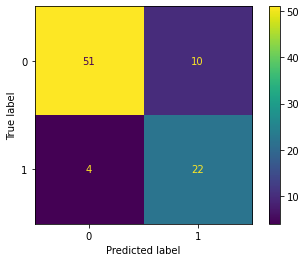

In [89]:
# Evaluating the default randomforest model 
# creating prediction data
best_y_pred_train = rf_gridcv_best.predict(X_train_smote)
best_y_pred_test = rf_gridcv_best.predict(X_test)

# Plotting confusion matrix 
cm = confusion_matrix(y_test, best_y_pred_test, labels=rf_gridcv_best.classes_) 

ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rf_gridcv_best.classes_).plot()

Berdasarkan hasil confussion matrix di atas diketahui bahwa model ini mampu memprediksi dengan benar kasus True Positif sebanyak 22 data dari 26 data test. Kasus True Positif adalah keadaan di mana pasien yang mengalami kematian karena gagal jantung dan diprediksi dengan benar bahwa pasien tersebut mengalami kematian karena gagal jantung. Bila ditinjau dari kasus False Negatif maka model ini mengalami kesalahan prediksi sebanyak 4 data dari 26 data. Kasus False Negatif adalah kondisi di mana pasien yang mengalami kematian karena gagal jantung namun hasil prediksinya adalah pasien tersebut dinyatakan tidak mengalami kematian karena gagal jantung.

In [91]:
# Evaluating the model
print("Training")
print(classification_report(y_train_smote,best_y_pred_train))
print("\n===========================\n")
print("Test")
print(classification_report(y_test,best_y_pred_test))


Training
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       140
           1       0.97      0.97      0.97       140

    accuracy                           0.97       280
   macro avg       0.97      0.97      0.97       280
weighted avg       0.97      0.97      0.97       280



Test
              precision    recall  f1-score   support

           0       0.93      0.84      0.88        61
           1       0.69      0.85      0.76        26

    accuracy                           0.84        87
   macro avg       0.81      0.84      0.82        87
weighted avg       0.86      0.84      0.84        87



Berdasarkan hasil dari classification report di atas, seperti yang kita inginkan yaitu meminimalisir kesalahan model dalam mempredict kelas 1 sehingga kita akan fokuskan pada nilai di recall. Berdasarkan analysis di atas dapat kita lihat jika randomforest dipasangkan dengan hyperparameter terpilih dari metode gridsearch dapat memperoleh nilai recalll yang lebih tinggi menjadi 85% dibandingkan randomforest dengan baseline hyperparameter yg memiliki selisih 4% dari hasil ini. 

## XII. MODEL INFERENCE

In [92]:
data_inf.head()

,age,anaemia,cpk,diabetes,ef,hbp,platelets,sCre,sSod,sex,smoking,time,DEATH_EVENT
0,65,0,146,0,20,0,162000,1.30,129,1,1,7,1
1,55,1,180,0,45,0,263358,1.18,137,1,1,211,0
2,85,0,129,0,60,0,306000,1.20,132,1,1,90,1
3,57,1,129,0,30,0,395000,1.00,140,0,0,42,1
4,62,0,231,0,25,1,253000,0.90,140,1,1,10,1


In [94]:
inference_cleaned = data_inf[['age', 'sCre', 'cpk', 'ef', 'sSod', 'time', 'hbp', 'DEATH_EVENT']]

inference_cleaned.head()

,age,sCre,cpk,ef,sSod,time,hbp,DEATH_EVENT
0,65,1.30,146,20,129,7,0,1
1,55,1.18,180,45,137,211,0,0
2,85,1.20,129,60,132,90,0,1
3,57,1.00,129,30,140,42,0,1
4,62,0.90,231,25,140,10,1,1


In [95]:
# numerical scalling
inference_cleaned[num_col] = scaler.transform(inference_cleaned[num_col])
inference_cleaned

,age,sCre,cpk,ef,sSod,time,hbp,DEATH_EVENT
0,0.454545,0.094118,0.012670,0.090909,0.095238,0.003788,0,1
1,0.272727,0.080000,0.017021,0.469697,0.476190,0.776515,0,0
2,0.818182,0.082353,0.010494,0.696970,0.238095,0.318182,0,1
3,0.309091,0.058824,0.010494,0.242424,0.619048,0.136364,0,1
4,0.400000,0.047059,0.023547,0.166667,0.619048,0.015152,1,1
5,0.272727,0.023529,0.100845,0.393939,0.619048,0.534091,0,0
6,0.254545,1.000000,0.048631,0.848485,0.476190,0.719697,1,1
7,0.545455,0.047059,0.006399,0.696970,0.523810,0.681818,1,0
8,0.418182,0.047059,0.007167,0.318182,0.428571,1.000000,0,0
9,0.363636,0.282353,0.002687,0.090909,0.000000,0.219697,0,1


In [96]:
X_inf = inference_cleaned.drop('DEATH_EVENT',axis=1).copy()

In [97]:
y_pred_inf = rf_gridcv_best.predict(X_inf)
y_pred_inf_df = pd.DataFrame(y_pred_inf, columns=['RF Prediction'])
y_pred_inf_df

,RF Prediction
0,1
1,0
2,1
3,1
4,1
5,0
6,1
7,0
8,0
9,1


In [98]:
# Joining inference data with predictions
pd.concat([inference_cleaned,y_pred_inf_df], axis=1)

,age,sCre,cpk,ef,sSod,time,hbp,DEATH_EVENT,RF Prediction
0,0.454545,0.094118,0.012670,0.090909,0.095238,0.003788,0,1,1
1,0.272727,0.080000,0.017021,0.469697,0.476190,0.776515,0,0,0
2,0.818182,0.082353,0.010494,0.696970,0.238095,0.318182,0,1,1
3,0.309091,0.058824,0.010494,0.242424,0.619048,0.136364,0,1,1
4,0.400000,0.047059,0.023547,0.166667,0.619048,0.015152,1,1,1
5,0.272727,0.023529,0.100845,0.393939,0.619048,0.534091,0,0,0
6,0.254545,1.000000,0.048631,0.848485,0.476190,0.719697,1,1,1
7,0.545455,0.047059,0.006399,0.696970,0.523810,0.681818,1,0,0
8,0.418182,0.047059,0.007167,0.318182,0.428571,1.000000,0,0,0
9,0.363636,0.282353,0.002687,0.090909,0.000000,0.219697,0,1,1


Pada tahapan inference ini, model yang digunakan untuk memprediksi kematian akibat penderita gagal jantung yaitu menggunakan best model hasil dari crossvalidation (randomforest model) dengan hyperparameter tuning ({'criterion': 'entropy', 'max_depth': 6, 'min_samples_split': 4, 'n_estimators': 100}). Percobaan model tersebut pada data inference ini menghasilkan model dapat berjalan dengan sangat baik dan model dapat memprediksi dengan benar

---

## KESIMPULAN:

Berdasarkan analisis yang telah dilakukan, kami berhasil membuat model machine learning untuk memprediksi apakah seseorang akan meninggal atau tidak yang disebabkan oleh gagal jantung.
Berdasarkan hasil seleksi fitur, fitur numerik yang memiliki korelasi paling tinggi dengan target adalah serum_creatinine. Kemudian, fitur kategorik yang memiliki korelasi paling tinggi dengan target adalah high_blood_pressure.
Sebelum dilakukannya modelling, dikarena data target dari awal merupakan data imbalance sehingga kami handling data target tersebut menjadi balance dengan menggunakan metode SMOTE.
Model machine learning yang telah dibuat adalah RandomForest Classifier dan AdaBoostClassifier.
Model RandomForest Classifier yang kami buat memiliki akurasi yang lebih tinggi dibandingkan AdaBoostClassifier dengan skor 0,83.
Random forest dapat dijalankan pada tugas klasifikasi sekaligus regresi. Selain itu, algoritma ini juga mampu menghasilkan prediksi dengan tingkat akurasi tinggi yang mudah dipahami. Jika diterapkan pada kumpulan dataset berskala besar, random forest akan bekerja secara efisien. Sayangnya, kelebihan tersebut pun disertai dengan beberapa kelemahan. Untuk bisa menghasilkan prediksi dengan tingkat akurasi tinggi, diperlukan lebih banyak sumber daya dalam proses komputasi. Makin banyak sumber daya yang diperlukan, artinya makin banyak juga waktu yang diperlukan untuk bisa memprediksi hasil.

Saran yang dapat kami berikan untuk proyek atau analisis tentang topik tersebut adalah:

Usahakan mendapatkan data yang lebih banyak karena dataset yang digunakan dalam proyek ini adalah dataset kecil.
kami sudah mencoba model classifier lain seperti GradientBoosting dan XGBoost Classifier, tapi ternyata tidak begitu bagus. Jadi, saran kami adalah mencoba model classifier lain dan mencoba dengan hyperparameter lainnya.

## CONCEPTUAL PROBLEM

1. Apakah yang dimaksud dengan Bagging?

Bagging dalam pembelajaran mesin mengacu pada algoritma pembelajaran ansambel yang menjalankan beberapa model basis homogen secara paralel dan menggabungkannya menggunakan metode rata-rata yang telah ditentukan sebelumnya. Random Forest adalah salah satu contoh dari algoritma bagging.

2. Jelaskan perbedaan algoritma Random Forest dengan algoritma boosting yang Anda pilih?

Perbedaan antara random forest dan adaptive boosting adalah cara model ansambel menjalankan model dasar (pengklasifikasi decision tree dalam kasus ini). Random Forest adalah algoritme bagging, yang artinya menjalankan beberapa model dasar secara paralel secara independen. Peningkatan adaptif atau AdaBoost adalah algoritme penguat, yang artinya menjalankan model dasar secara berurutan satu demi satu dengan belajar dari model sebelumnya secara berurutan. Algoritma bagging menghasilkan model yang memiliki variansi lebih rendah sedangkan algoritme boosting menghasilkan model yang memiliki bias lebih rendah.

Referensi: https://towardsdatascience.com/ensemble-methods-bagging-boosting-and-stacking-c9214a10a205